In [ ]:
# installments

!pip install yfinance
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports

import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import pandas_datareader

In [ ]:
# getting symbols for stocks in top risers





RKT = yf.download("RKT", start = "2011-01-01", end= "2021-01-01")
AZN = yf.download("AZN", start = "2011-01-01", end= "2021-01-01")
PSH = yf.download("PSH", start = "2011-01-01", end= "2021-01-01")
AUTO   = yf.download("AUTO", start = "2011-01-01", end= "2021-01-01")
GSK = yf.download("GSK", start = "2011-01-01", end= "2021-01-01")
DGE = yf.download("DGE", start = "2011-01-01", end= "2021-01-01")
SHEL = yf.download("SHEL", start = "2011-01-01", end= "2021-01-01")

# uncomment the stock that is going to be tested. (Make sure rest is commented)

data = RKT
#data = AZN
#data = PSH
#data = AUTO	
#data = GSK
#data = DGE
#data = SHEL

#putting data into pandas dataframe to visualise data

data_pd = pd.DataFrame(data)


data_pd['Date'] = data_pd.index


dataframe = pd.DataFrame({'Date':data_pd['Date'],'actual':data_pd['Close']})
dataframe = dataframe.reset_index(drop=True)
print(dataframe)

# checking for NaN values
data_pd.isnull().values.any()

# dropping any Nan values if any

data_pd.dropna(axis=0)




# get the close prices from the data
close_prices = data_pd['Close']
values = close_prices.values
# 80:20 split for training data 
training_data_len = math.ceil(len(values)* 0.8)





# scaling the data 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
           Date     actual
0    2011-01-03  67.080002
1    2011-01-04  67.459999
2    2011-01-05  66.849998
3    2011-01-06  65.739998
4    2011-01-07  65.750000
...         ...        ...
2512 2020-12-24  35.830002
2513 2020-12-28  35.900002
2514 2020-12-29  36.139999
2515 2020-12-30  36.029999
2516 2020-12-31  35.139999

[2517 rows x 2 columns]


In [ ]:
# look 60 days into the past to predict next price

prediction_days = 60
# getting x train and y train values
x_train = []
y_train = []

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# preparing the test data 

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(prediction_days, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#building the model

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 11s 73ms/step - loss: 0.0372
Epoch 2/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0072
Epoch 3/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0062
Epoch 4/100
62/62 [==============================] - 5s 82ms/step - loss: 0.0061
Epoch 5/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0053
Epoch 6/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0059
Epoch 7/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0054
Epoch 8/100
62/62 [==============================] - 5s 76ms/step - loss: 0.0049
Epoch 9/100
62/62 [==============================] - 5s 75ms/step - loss: 0.0060
Epoch 10/100
62/62 [==============================] - 5s 82ms/step - loss: 0.0050
Epoch 11/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0049
Epoch 12/100
62/62 [==============================] - 5s 74ms/step - loss: 0.0047
Epoch 13/100
62/62 [====

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# getting root mean sqaured errpr
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error(y_test, predictions)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)


Root Mean Square Error: 1.2861483085467864


In [ ]:
# comparing the predicted and actual stock closing prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# comparing  predictions with the actual results from the 20% of the total data used to make predictions on
dataframe = pd.DataFrame({'actual':y_test.flatten(),'predicted':predictions.flatten()})
print(dataframe)

        actual  predicted
0    60.549999  59.109661
1    60.630001  59.901344
2    60.259998  60.439938
3    60.959999  60.357090
4    61.240002  60.516449
..         ...        ...
498  35.830002  34.890121
499  35.900002  35.135345
500  36.139999  35.407764
501  36.029999  35.599712
502  35.139999  35.626175

[503 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


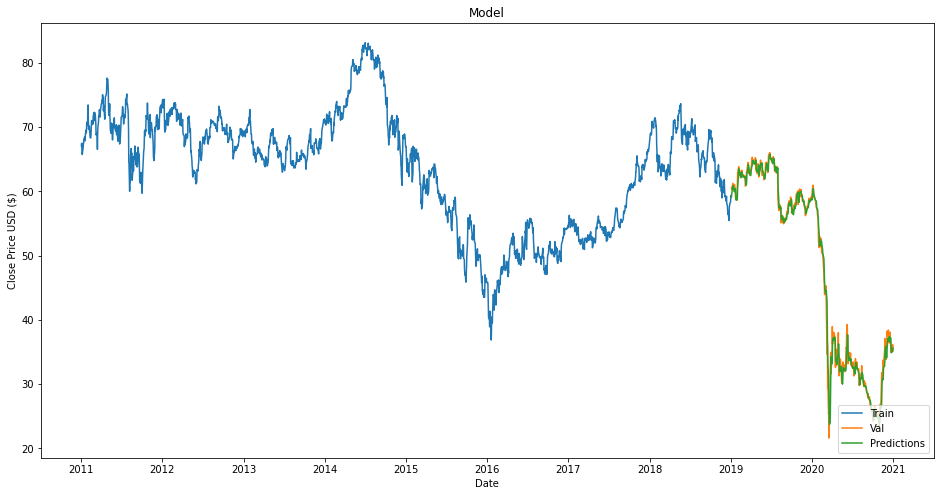

In [ ]:
# plotting results
data = data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()